In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy.stats import wasserstein_distance
from mpl_toolkits.mplot3d import Axes3D

In [96]:
SEED = 42
np.random.seed(SEED)

In [98]:
standard_normal = np.random.normal(size=140)


In [100]:
standard_normal

array([ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986, -0.23415337,
       -0.23413696,  1.57921282,  0.76743473, -0.46947439,  0.54256004,
       -0.46341769, -0.46572975,  0.24196227, -1.91328024, -1.72491783,
       -0.56228753, -1.01283112,  0.31424733, -0.90802408, -1.4123037 ,
        1.46564877, -0.2257763 ,  0.0675282 , -1.42474819, -0.54438272,
        0.11092259, -1.15099358,  0.37569802, -0.60063869, -0.29169375,
       -0.60170661,  1.85227818, -0.01349722, -1.05771093,  0.82254491,
       -1.22084365,  0.2088636 , -1.95967012, -1.32818605,  0.19686124,
        0.73846658,  0.17136828, -0.11564828, -0.3011037 , -1.47852199,
       -0.71984421, -0.46063877,  1.05712223,  0.34361829, -1.76304016,
        0.32408397, -0.38508228, -0.676922  ,  0.61167629,  1.03099952,
        0.93128012, -0.83921752, -0.30921238,  0.33126343,  0.97554513,
       -0.47917424, -0.18565898, -1.10633497, -1.19620662,  0.81252582,
        1.35624003, -0.07201012,  1.0035329 ,  0.36163603, -0.64

In [102]:
scenarios = (
        50
        + np.sqrt(100) * standard_normal
        + 0 * (standard_normal ** 2 - 1)
        + 3 * (standard_normal ** 3 - 3 * standard_normal)
    )

In [104]:
scenarios = np.clip(scenarios, 0, None)


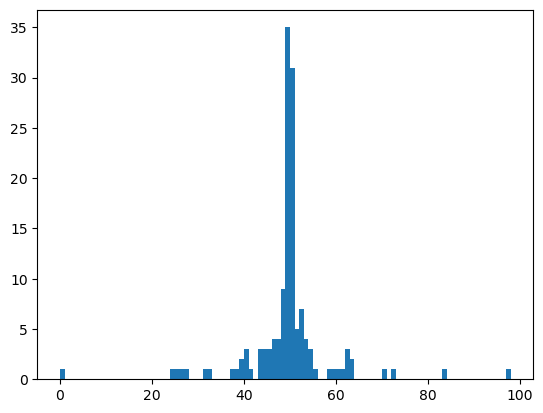

In [106]:
plt.hist(scenarios, bins=np.arange(scenarios.min(), scenarios.max()+1))
plt.show()

In [108]:
def moment_matching(mean, variance, skewness, kurtosis, num_scenarios):
    """
    Generate scenarios by matching the moments of a given distribution.
    
    Args:
        mean (float): Mean of the distribution.
        variance (float): Variance of the distribution.
        skewness (float): Skewness of the distribution.
        kurtosis (float): Kurtosis of the distribution.
        num_scenarios (int): Number of scenarios to generate.

    Returns:
        np.array: Scenarios that match the specified moments.
    """
    standard_normal = np.random.normal(size=num_scenarios)
    scenarios = (
        mean
        + np.sqrt(variance) * standard_normal
        + skewness * (standard_normal ** 2 - 1)
        + kurtosis * (standard_normal ** 3 - 3 * standard_normal)
    )
    
    scenarios = np.clip(scenarios, 0, None)
    
    return scenarios

In [116]:
scenarios = moment_matching(50,100,0,3,140)

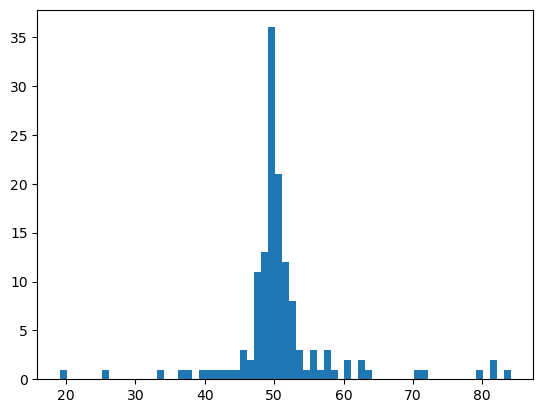

In [118]:
plt.hist(scenarios, bins=np.arange(scenarios.min(), scenarios.max()+1))
plt.show()

In [120]:
target_dist = np.random.normal(loc=50, scale=10, size=2000)  # example target

In [122]:
target_dist

array([70.60747925, 67.55340842, 47.51035852, ..., 53.40589216,
       53.90695921, 36.73527872])

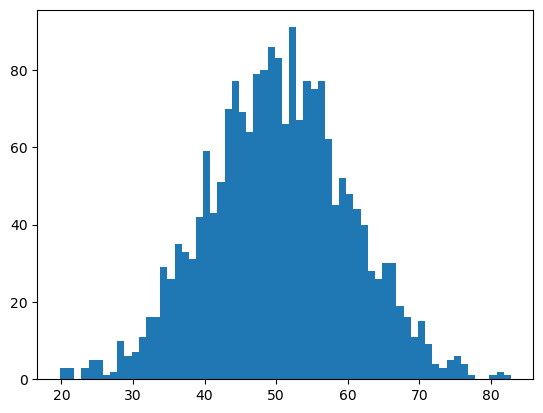

In [134]:
plt.hist(target_dist, bins=np.arange(target_dist.min(), target_dist.max()+1))
plt.show()

In [138]:
for _ in range(100):
    for i in range(len(scenarios)):
        # Propose a small random adjustment
        adjustment = np.random.normal(scale=0.1)
        updated_scenarios = scenarios.copy()
        updated_scenarios[i] += adjustment

        # Accept the update if it improves (lowers) the Wasserstein distance
        if wasserstein_distance(target_dist, updated_scenarios) < \
            wasserstein_distance(target_dist, scenarios):
            scenarios = updated_scenarios

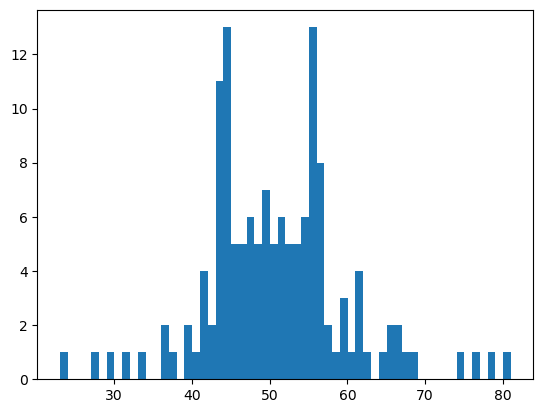

In [140]:
plt.hist(scenarios, bins=np.arange(scenarios.min(), scenarios.max()+1))
plt.show()

In [142]:
def minimize_wasserstein_distance(target_distribution, initial_scenarios, max_iterations=100):
    """
    Naive approach to minimize the Wasserstein distance between generated scenarios 
    and a target distribution, by small random adjustments.

    Args:
        target_distribution (np.array): Target demand (or other) distribution.
        initial_scenarios (np.array): Initial scenarios.
        max_iterations (int): Maximum iterations for optimization.

    Returns:
        np.array: Optimized scenarios.
    """
    current_scenarios = initial_scenarios.copy()
    for _ in range(max_iterations):
        for i in range(len(current_scenarios)):
            # Propose a small random adjustment
            adjustment = np.random.normal(scale=0.1)
            updated_scenarios = current_scenarios.copy()
            updated_scenarios[i] += adjustment

            # Accept the update if it improves (lowers) the Wasserstein distance
            if wasserstein_distance(target_distribution, updated_scenarios) < \
               wasserstein_distance(target_distribution, current_scenarios):
                current_scenarios = updated_scenarios
    return current_scenarios

In [144]:
def generate_advanced_scenarios(mean, variance, skewness, kurtosis,
                                num_scenarios, target_distribution,
                                max_iterations=100):
    """
    Generate advanced scenarios using:
       - Moment matching
       - Wasserstein distance minimization

    Returns:
        np.array of scenario values (e.g., demands).
    """
    # Step 1: Moment Matching
    initial_scenarios = moment_matching(mean, variance, skewness, kurtosis, num_scenarios)

    # Step 2: Wasserstein Distance Minimization
    optimized_scenarios = minimize_wasserstein_distance(target_distribution,
                                                        initial_scenarios,
                                                        max_iterations)
    return optimized_scenarios

In [146]:
scenarios = generate_advanced_scenarios(
        mean=50, variance=100, skewness=0.0, kurtosis=3.0,
        num_scenarios=140,  # Reduced from 200
        target_distribution=target_dist
    )

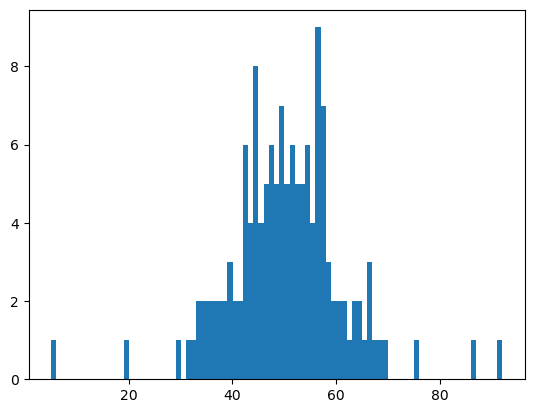

In [147]:
plt.hist(scenarios, bins=np.arange(scenarios.min(), scenarios.max()+1))
plt.show()

In [837]:
aa

NameError: name 'aa' is not defined

In [150]:
base_demands = [100, 150]     # alpha_i
price_sensitivities = [2, 3]  # beta_i

In [204]:
target_distribution = np.random.normal(loc=1.0, scale=0.5, size=1000)
scenario_means = generate_advanced_scenarios(
        mean=50, variance=100, skewness=0.0, kurtosis=3.0,
        num_scenarios=140, target_distribution=target_dist
        )
# Convert them into dicts of (mean, var)
scenarios = []
for m in scenario_means:
    scenarios.append({
    'mean': m,
    'variance': np.random.uniform(0.8, 1.2)  # random scale
})

In [205]:
scenarios

[{'mean': 48.89380078073714, 'variance': 1.0309428524013047},
 {'mean': 67.02104073917104, 'variance': 1.051189814849522},
 {'mean': 56.40219832817893, 'variance': 1.0073179416856641},
 {'mean': 45.76775711693551, 'variance': 0.9556089551082416},
 {'mean': 51.89581666817255, 'variance': 1.1519131854715428},
 {'mean': 123.34430410169465, 'variance': 1.1207670439424449},
 {'mean': 54.84788367394636, 'variance': 1.1993622287248555},
 {'mean': 63.922857949141246, 'variance': 0.9650771507808371},
 {'mean': 47.47657008640225, 'variance': 0.8154973967767282},
 {'mean': 53.93216733310653, 'variance': 1.0605482381379296},
 {'mean': 44.63950793483138, 'variance': 1.1133707422362822},
 {'mean': 45.17481837412864, 'variance': 1.1747137173089734},
 {'mean': 56.439068633531384, 'variance': 0.8041455868786584},
 {'mean': 43.505606290145224, 'variance': 1.1518328043339328},
 {'mean': 40.007922942659825, 'variance': 1.0066952293014888},
 {'mean': 56.2008881843637, 'variance': 0.9499271335173088},
 {'me

In [208]:
num_samples = 100
prices = [20,30]
noise_std = 10

# Probabilities for picking each scenario at random
weights = np.ones(len(scenarios))
scenario_prob = weights / weights.sum()
scenario_indices = np.random.choice(len(scenarios), size=num_samples, p=scenario_prob)

num_products = len(prices)
demand_samples = np.zeros((num_samples, num_products))

for i in range(num_products):
    alpha_i = base_demands[i]
    beta_i = price_sensitivities[i]
    p_i = prices[i]

    for j, scenario_idx in enumerate(scenario_indices):
        sc = scenarios[scenario_idx]
        sc_mean = sc['mean']
        sc_std = np.sqrt(sc['variance'])

        scenario_effect = np.random.normal(loc=sc_mean, scale=sc_std)
        noise = np.random.normal(loc=0, scale=noise_std)

        demand_ij = alpha_i - beta_i * p_i + scenario_effect + noise
        # Ensure demand is non-negative (realistic limit)
        demand_samples[j, i] = max(demand_ij, 0)

product_cols = [f"Product_{k+1}" for k in range(num_products)]

In [210]:
df = pd.DataFrame(demand_samples, columns=product_cols)

In [213]:
df

Product_1   Product_2
0   115.380965  134.215766
1    93.348572   86.160408
2   128.738456  122.065845
3   108.042055  112.776025
4    69.557839   53.316060
..         ...         ...
95  107.901755  100.538846
96  117.087035  112.922674
97  133.704509  120.690413
98  111.032111  113.892572
99  124.838376  124.884213

[100 rows x 2 columns]

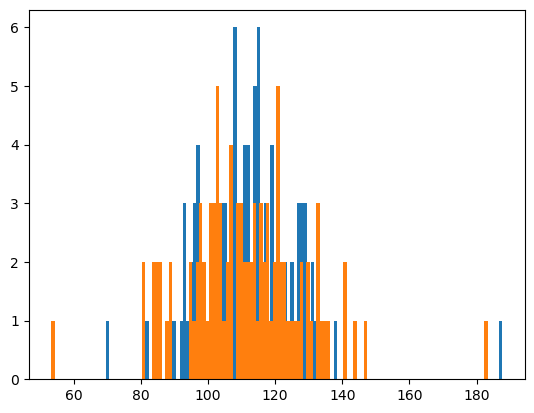

In [215]:
plt.hist(df.Product_1, bins=np.arange(df.Product_1.min(), df.Product_1.max()+1))
plt.hist(df.Product_2, bins=np.arange(df.Product_2.min(), df.Product_2.max()+1))
plt.show()

In [217]:
def generate_stochastic_demand_linear(prices, num_samples=1000,
                                      noise_std=5, scenarios=None):
    """
    Generate stochastic demand samples for each product using a simple linear model
    without cross-elasticities. Demand for product i is:

        demand_i = alpha_i - beta_i * price_i + scenario_effect + random_noise

    If no 'scenarios' are provided, we generate them via advanced scenario generation.

    Args:
        prices (list or np.array): Prices of products.
        num_samples (int): Number of demand samples to generate.
        noise_std (float): Std for the additional random noise term.
        scenarios (list of dict or None): 
            If provided, each dict has {'mean', 'variance'}.
            If None, uses default advanced scenario generation.

    Returns:
        pd.DataFrame: Demand samples for each product.
    """
    # Example fixed base demands and price sensitivities
    base_demands = [100, 150]     # alpha_i
    price_sensitivities = [2, 3]  # beta_i

    # If no scenarios provided, create some "fake" advanced scenarios
    if scenarios is None:
        # Example: target distribution for advanced scenario generation
        target_distribution = np.random.normal(loc=1.0, scale=0.5, size=1000)
        # Make 3 advanced scenario means
        scenario_means = generate_advanced_scenarios(
                mean=50, variance=100, skewness=0.0, kurtosis=3.0,
                num_scenarios=140, target_distribution=target_dist
                )
        # Convert them into dicts of (mean, var)
        scenarios = []
        for m in scenario_means:
            scenarios.append({
                'mean': m,
                'variance': np.random.uniform(0.8, 1.2)  # random scale
            })

    # Probabilities for bpicking each scenario at random
    weights = np.ones(len(scenarios))
    scenario_prob = weights / weights.sum()
    scenario_indices = np.random.choice(len(scenarios), size=num_samples, p=scenario_prob)

    num_products = len(prices)
    demand_samples = np.zeros((num_samples, num_products))

    for i in range(num_products):
        alpha_i = base_demands[i]
        beta_i = price_sensitivities[i]
        p_i = prices[i]

        for j, scenario_idx in enumerate(scenario_indices):
            sc = scenarios[scenario_idx]
            sc_mean = sc['mean']
            sc_std = np.sqrt(sc['variance'])

            scenario_effect = np.random.normal(loc=sc_mean, scale=sc_std)
            noise = np.random.normal(loc=0, scale=noise_std)

            demand_ij = alpha_i - beta_i * p_i + scenario_effect + noise
            # Ensure demand is non-negative (realistic limit)
            demand_samples[j, i] = max(demand_ij, 0)

    product_cols = [f"Product_{k+1}" for k in range(num_products)]
    return pd.DataFrame(demand_samples, columns=product_cols)

In [291]:
demand_data = generate_stochastic_demand_linear(prices=prices, num_samples=500, noise_std=10)


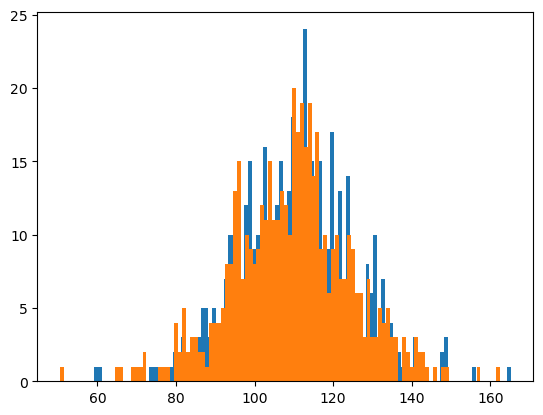

In [292]:
plt.hist(demand_data.Product_1, bins=np.arange(demand_data.Product_1.min(), demand_data.Product_1.max()+1))
plt.hist(demand_data.Product_2, bins=np.arange(demand_data.Product_2.min(), demand_data.Product_2.max()+1))
plt.show()

In [223]:
demand_data = generate_stochastic_demand_linear(prices=[30,30], num_samples=500, noise_std=10)


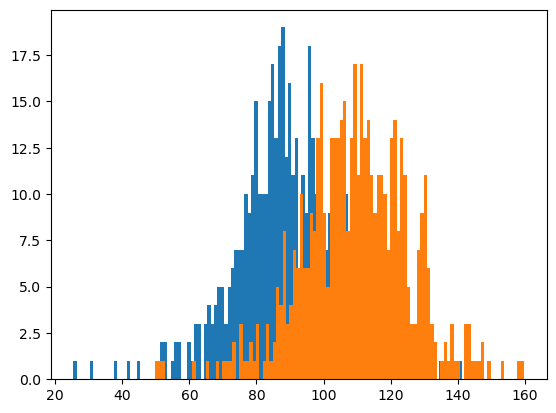

In [224]:
plt.hist(demand_data.Product_1, bins=np.arange(demand_data.Product_1.min(), demand_data.Product_1.max()+1))
plt.hist(demand_data.Product_2, bins=np.arange(demand_data.Product_2.min(), demand_data.Product_2.max()+1))
plt.show()

In [227]:
demand_data

Product_1   Product_2
0    94.357077  138.384065
1    89.620441  112.286103
2    76.404019   93.997199
3    78.496544   82.709247
4    75.248185   92.900913
..         ...         ...
495  70.265233  115.437714
496  90.060444   95.674663
497  79.065072   91.236655
498  91.091973  100.814009
499  87.922063   88.620029

[500 rows x 2 columns]

In [247]:
import numpy as np
from scipy import stats

In [345]:
hist_1 = np.histogram(demand_data.Product_1,bins=50)
dist_1 = stats.rv_histogram(hist)
expected_value_1 = dist.expect()

In [303]:
hist_2 = np.histogram(demand_data.Product_2,bins=50)
dist_2 = stats.rv_histogram(hist)
expected_value_2 = dist.expect()

/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_distn_infrastructure.py:2957: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  lbc = integrate.quad(fun, lb, c, **kwds)[0]
/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_distn_infrastructure.py:2958: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain

In [311]:
expected_value = [expected_value_1,expected_value_2]

In [317]:
revenue = np.dot(prices,expected_value)

In [319]:
revenue

5484.143093994231

In [544]:
def calculate_revenue(demand_data,prices):
    hist_1 = np.histogram(demand_data.Product_1,bins=50)
    dist_1 = stats.rv_histogram(hist_1)
    expected_value_1 = dist_1.expect()
    
    hist_2 = np.histogram(demand_data.Product_2,bins=50)
    dist_2 = stats.rv_histogram(hist_2)
    expected_value_2 = dist_2.expect()
    expected_value = [expected_value_1.round(),expected_value_2.round()]
    revenue = np.dot(prices,expected_value)
    return revenue

In [546]:
calculate_revenue(demand_data,prices)

0.0

In [339]:
import warnings

In [341]:
warnings.filterwarnings('ignore')

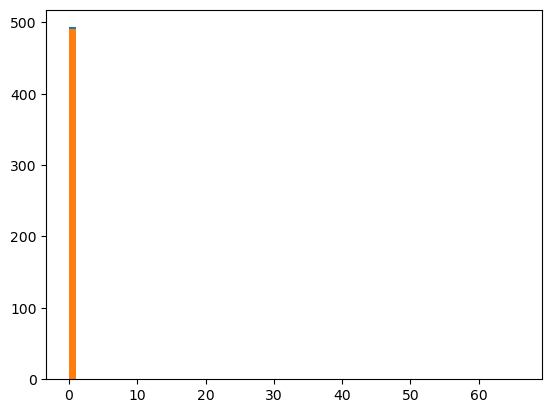

In [548]:
demand_data = generate_stochastic_demand_linear(prices=[100,80], num_samples=500, noise_std=10)
plt.hist(demand_data.Product_1, bins=np.arange(demand_data.Product_1.min(), demand_data.Product_1.max()+1))
plt.hist(demand_data.Product_2, bins=np.arange(demand_data.Product_2.min(), demand_data.Product_2.max()+1))
plt.show()

90 - 80 when the both dist. of demands are 0 

In [811]:
price_range_1 = np.linspace(20,100,5)
price_range_2 = np.linspace(30,80,5)

In [813]:
price_range_1

array([ 20.,  40.,  60.,  80., 100.])

In [815]:
price_range_2

array([30. , 42.5, 55. , 67.5, 80. ])

In [817]:
results = []  # to store [p1, p2, revenue]

for p1 in price_range_1:
    for p2 in price_range_2:
        demand_data = generate_stochastic_demand_linear(prices=[p1, p2], 
                                                        num_samples=1000, 
                                                        noise_std=10)
        revenue = calculate_revenue(demand_data, [p1, p2])
        results.append([p1, p2, revenue])

# Create a DataFrame from the collected results
df = pd.DataFrame(results, columns=['p1', 'p2', 'revenue'])

# Optionally display or save df
print(df)

       p1    p2  revenue
0    20.0  30.0   5500.0
1    20.0  42.5   5427.5
2    20.0  55.0   4255.0
3    20.0  67.5   2537.5
4    20.0  80.0   2200.0
5    40.0  30.0   6030.0
6    40.0  42.5   5942.5
7    40.0  55.0   4820.0
8    40.0  67.5   3070.0
9    40.0  80.0   2880.0
10   60.0  30.0   5010.0
11   60.0  42.5   4860.0
12   60.0  55.0   3785.0
13   60.0  67.5   2392.5
14   60.0  80.0   2000.0
15   80.0  30.0   3400.0
16   80.0  42.5   3385.0
17   80.0  55.0   2030.0
18   80.0  67.5    497.5
19   80.0  80.0    240.0
20  100.0  30.0   3460.0
21  100.0  42.5   3245.0
22  100.0  55.0   1925.0
23  100.0  67.5    337.5
24  100.0  80.0      0.0


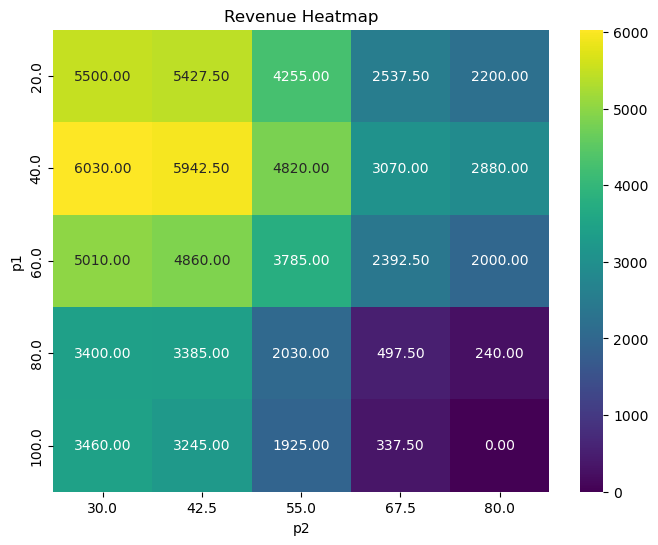

In [818]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Suppose df has columns: p1, p2, revenue
# Pivot the DataFrame to create a matrix
df_pivot = df.pivot(index='p1', columns='p2', values='revenue')

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_pivot, annot=True, fmt=".2f", cmap="viridis")
plt.title("Revenue Heatmap")
plt.show()


In [794]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from scipy.optimize import minimize

In [796]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression  # Changed import
from sklearn.pipeline import Pipeline
from mpl_toolkits.mplot3d import Axes3D  # Necessary for 3D plotting

def fit_and_visualize_surface(revenue_df):
    """
    Fits a Linear regression model with polynomial features to the revenue data and visualizes the response surface.
    
    Parameters:
    revenue_df (pd.DataFrame): DataFrame containing 'p1', 'p2', and 'revenue' columns.
    
    Returns:
    pipeline (Pipeline): Trained sklearn Pipeline containing preprocessing and regression steps.
    scaler_y (MinMaxScaler): Scaler used for the target variable.
    response_function (function): Function to predict revenue based on p1 and p2.
    """
    
    # Ensure the input DataFrame contains the required columns
    required_columns = {'p1', 'p2', 'revenue'}
    if not required_columns.issubset(revenue_df.columns):
        raise ValueError(f"Input DataFrame must contain columns: {required_columns}")
    
    # Features and target
    X = revenue_df[['p1', 'p2']]
    y = revenue_df['revenue'].values.reshape(-1, 1)
    
    # Initialize scalers for X and y
    scaler_X = MinMaxScaler(feature_range=(-1, 1))
    scaler_y = MinMaxScaler(feature_range=(-1, 1))
    
    # Define a pipeline for polynomial feature transformation and Linear regression
    pipeline = Pipeline([
        ('scaler_X', scaler_X),
        ('poly', PolynomialFeatures(degree=3, include_bias=False)),
        ('linear_reg', LinearRegression())  # Changed estimator
    ])
    
    # Fit the scaler for y and transform y
    y_normalized = scaler_y.fit_transform(y).flatten()
    
    # Fit the pipeline with normalized X and y
    pipeline.fit(X, y_normalized)
    
    # Define response function
    def response_function(p1, p2):
        """
        Predicts revenue based on p1 and p2 using the trained model.
        
        Parameters:
        p1 (float or np.ndarray): Value(s) for parameter p1.
        p2 (float or np.ndarray): Value(s) for parameter p2.
        
        Returns:
        revenue_pred (float or np.ndarray): Predicted revenue.
        """
        input_data = np.vstack([p1, p2]).T
        X_scaled = scaler_X.transform(input_data)
        X_poly = pipeline.named_steps['poly'].transform(X_scaled)
        y_pred_normalized = pipeline.named_steps['linear_reg'].predict(X_poly)  # Changed step name
        revenue_pred = scaler_y.inverse_transform(y_pred_normalized.reshape(-1, 1)).flatten()
        return revenue_pred
    
    # Create a grid of p1 and p2 values for visualization
    p1_min, p1_max = X['p1'].min(), X['p1'].max()
    p2_min, p2_max = X['p2'].min(), X['p2'].max()
    p1_vals = np.linspace(p1_min, p1_max, 100)
    p2_vals = np.linspace(p2_min, p2_max, 100)
    p1_grid, p2_grid = np.meshgrid(p1_vals, p2_vals)
    
    # Predict revenue over the grid
    z_vals = response_function(p1_grid.ravel(), p2_grid.ravel()).reshape(p1_grid.shape)
    
    # 3D Surface Plot
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    surface = ax.plot_surface(p1_grid, p2_grid, z_vals, cmap='viridis', edgecolor='none', alpha=0.8)
    ax.set_title("Response Surface for Revenue")
    ax.set_xlabel("P1")
    ax.set_ylabel("P2")
    ax.set_zlabel("Revenue")
    fig.colorbar(surface, shrink=0.5, aspect=5)
    plt.show()
    
    # Contour Plot
    plt.figure(figsize=(10, 7))
    contour = plt.contourf(p1_grid, p2_grid, z_vals, cmap='viridis', levels=50)
    plt.colorbar(contour)
    plt.title("Contour Plot of Revenue Surface")
    plt.xlabel("P1")
    plt.ylabel("P2")
    plt.show()
    
    return pipeline, scaler_y, response_function

# Example Usage:
# Assuming you have a DataFrame `df` with columns 'p1', 'p2', and 'revenue'
# model_pipeline, target_scaler, predict_revenue = fit_and_visualize_surface(df)


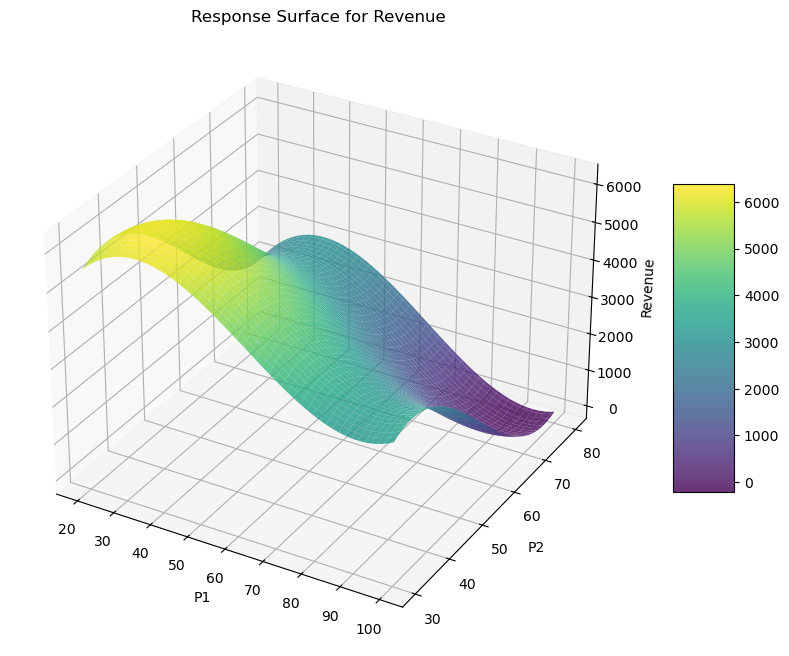

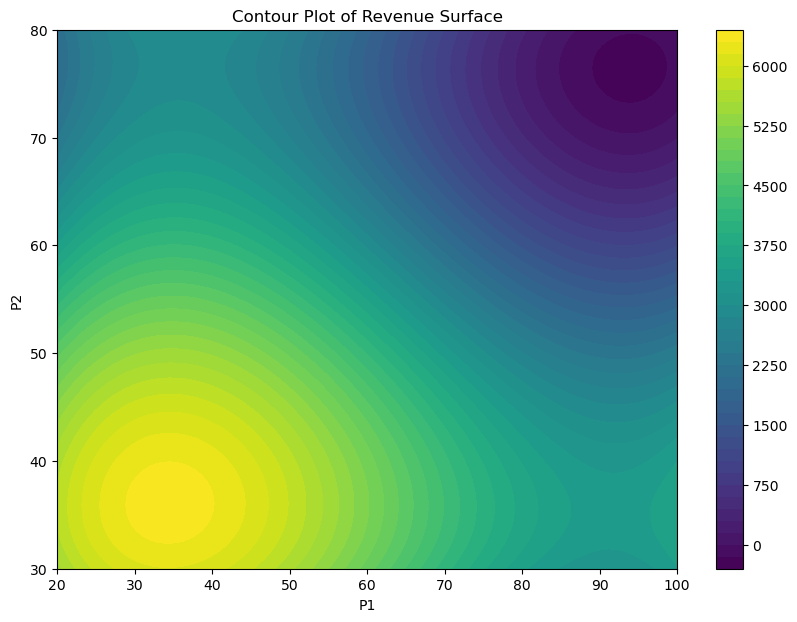

In [819]:
# Call the updated function
pipeline, scaler_y, response_function = fit_and_visualize_surface(df)

In [820]:
from scipy.optimize import minimize

def optimize_prices(response_function, p1_bounds, p2_bounds):
    """
    Optimize p1 and p2 to maximize revenue using the provided response function.

    Parameters:
    response_function (function): Function that takes p1 and p2 and returns predicted revenue.
    p1_bounds (tuple): (min, max) bounds for p1.
    p2_bounds (tuple): (min, max) bounds for p2.

    Returns:
    optimal_p1 (float): Optimal value for p1.
    optimal_p2 (float): Optimal value for p2.
    optimal_revenue (float): Predicted revenue at optimal p1 and p2.
    """

    # Define the objective function to minimize (negative revenue)
    objective_function = lambda x: -response_function(x[0], x[1])

    # Initial guess: midpoint of the bounds
    initial_guess = [
        (p1_bounds[0] + p1_bounds[1]) / 2,
        (p2_bounds[0] + p2_bounds[1]) / 2
    ]

    # Define bounds for p1 and p2
    bounds = [p1_bounds, p2_bounds]

    # Perform the optimization
    result = minimize(objective_function, initial_guess, bounds=bounds)

    # Check if the optimization was successful
    if not result.success:
        raise ValueError(f"Optimization failed: {result.message}")

    # Extract optimal p1 and p2
    optimal_p1, optimal_p2 = result.x

    # Compute the optimal revenue using the response function
    optimal_revenue = response_function(optimal_p1, optimal_p2)

    return optimal_p1, optimal_p2, optimal_revenue


In [821]:
# Determine the bounds for p1 and p2 based on the data
p1_min, p1_max = df['p1'].min(), df['p1'].max()
p2_min, p2_max = df['p2'].min(), df['p2'].max()

# Optimize to find the best p1 and p2 values
optimal_p1, optimal_p2, optimal_revenue = optimize_prices(
    response_function,
    p1_bounds=(p1_min, p1_max),
    p2_bounds=(p2_min, p2_max)
)

print(f"Optimal p1: {optimal_p1}")
print(f"Optimal p2: {optimal_p2}")
print(f"Optimal Revenue: {optimal_revenue}")

Optimal p1: 34.385839746000514
Optimal p2: 36.01939126043031
Optimal Revenue: [6389.08789478]


In [833]:
optimal_price_set = [optimal_p1, optimal_p2]
optimal_demand_data = generate_stochastic_demand_linear(prices=optimal_price_set, num_samples=10000, noise_std=10)
calculate_revenue(optimal_demand_data,optimal_price_set)

6099.03701538563

In [823]:
df.revenue.max()

6030.0

In [834]:
# Calculate the revenue increase
revenue_increase = calculate_revenue(optimal_demand_data, optimal_price_set) - df['revenue'].max()

print(f"Revenue increased by {revenue_increase}")


Revenue increased by 69.03701538563018
